[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/AI-og-helse/blob/main/uke01-introduksjon/02-hva-er-ai.ipynb)

# 🤖 Hva er Kunstig Intelligens?

## Læringsmål
- Definere kunstig intelligens
- Forstå forskjellen på "smal" og "generell" AI
- Kjenne til Turing-testen og dens relevans
- Se praktiske eksempler på AI i hverdagen og helsevesenet

In [3]:
print("🧠 La oss utforske hva AI egentlig er!")

🧠 La oss utforske hva AI egentlig er!


### Men først: 🔧 miljøoppsett - kode skal fungere både lokalt, i Codespaces samt Google Colab

In [17]:
import sys
import subprocess
import os

# Sjekk om vi kjører i Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    print("🚀 Kjører i Google Colab")
    
    # Installer nødvendige pakker som ikke er forhåndsinstallert i Colab
    !pip install seaborn --quiet
    
    # Sjekk om mappen allerede eksisterer
    if not os.path.exists('AI-og-helse'):
        print("📥 Laster ned kursmateriell...")
        try:
            # Prøv å klone repositoryet (da være public)
            #!git clone https://github.com/arvidl/AI-og-helse.git
            print("✅ Repository klonet vellykket!")
        except:
            print("⚠️ Kunne ikke klone repository automatisk")
            print("💡 Du kan laste opp filer manuelt eller bruke en annen metode")
    
    # Bytt til riktig mappe hvis den eksisterer
    if os.path.exists('AI-og-helse'):
        os.chdir('AI-og-helse')
        print(f"📁 Byttet til mappe: {os.getcwd()}")
    else:
        print("📂 Arbeider i standard Colab-mappe")
        
else:
    print("💻 Kjører i lokal miljø/Codespaces")

# Standard imports som fungerer overalt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Miljø er konfigurert og klart!")

💻 Kjører i lokal miljø/Codespaces
✅ Miljø er konfigurert og klart!


## Definisjon av AI

**Kunstig intelligens (AI)** er systemer som kan:
- 🎯 Løse oppgaver som normalt krever menneskelig intelligens
- 📚 Lære fra erfaring
- 🔄 Tilpasse seg nye situasjoner
- 💭 Resonere og ta beslutninger

### Men hva betyr "intelligens"?

In [5]:
# Interaktiv demonstrasjon: Er dette intelligent?
def er_dette_ai(beskrivelse, svar=None):
    """Vurder om noe er AI eller ikke"""
    print(f"❓ {beskrivelse}")
    bruker_svar = input("Er dette AI? (ja/nei): ").lower()
    
    if svar:
        if bruker_svar == svar:
            print("✅ Riktig!")
        else:
            print(f"🤔 Faktisk {svar}!")
    
    return bruker_svar

# Test din forståelse
eksempler = [
    ("En kalkulator som regner 2+2", "nei"),
    ("Google Maps som finner korteste vei", "ja"),
    ("Automatisk oversettelse av tekst", "ja"),
    ("En termostat som holder konstant temperatur", "nei"),
    ("Ansiktsgjenkjenning på telefonen", "ja"),
    ("En database som lagrer pasientdata", "nei")
]

print("🎮 Quiz: Er dette AI?")
print("-" * 40)
# for beskrivelse, fasit in eksempler:
#     er_dette_ai(beskrivelse, fasit)
#     print()

🎮 Quiz: Er dette AI?
----------------------------------------


## Smal vs Generell AI

### 🎯 Smal AI (Narrow AI / ANI)
- Designet for spesifikke oppgaver
- All dagens AI er smal AI
- Eksempler: Sjakk-AI, bildegjenkjenning, språkoversettelse

### 🌍 Generell AI (AGI)
- Kan løse hvilken som helst intellektuell oppgave
- Menneskelignende intelligens
- Eksisterer ikke enda (og kanskje aldri?)

### 🚀 Superintelligens (ASI)
- Overgår menneskelig intelligens på alle områder
- Science fiction (foreløpig!)

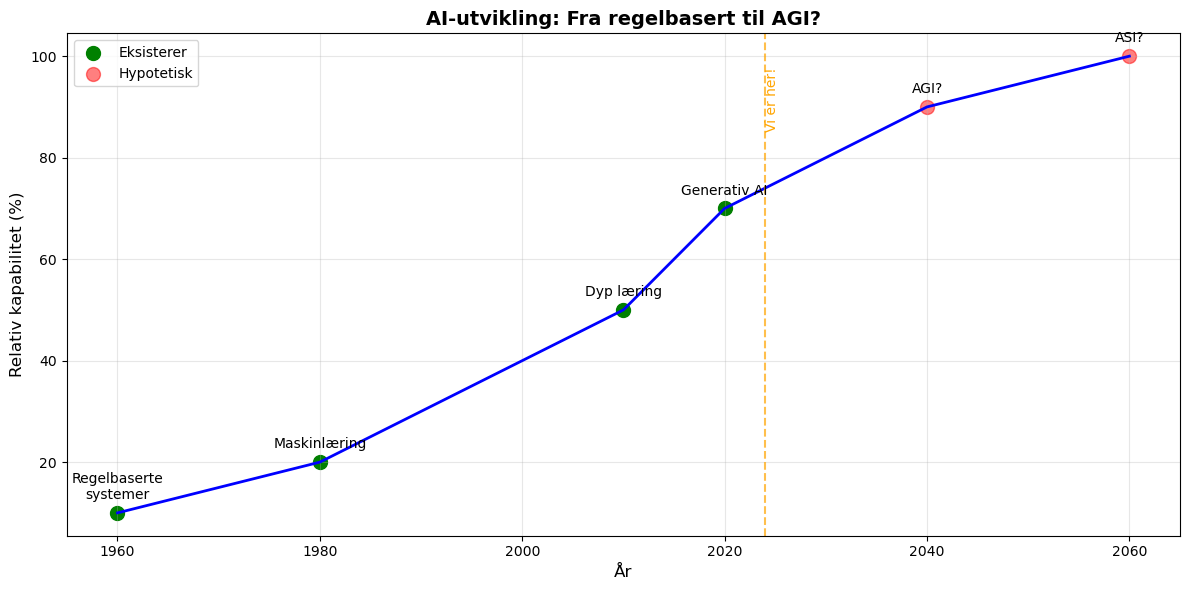

In [6]:
# Visualiser AI-spekteret
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(12, 6))

# AI-typer på en tidslinje
ai_types = ['Regelbaserte\nsystemer', 'Maskinlæring', 'Dyp læring', 
            'Generativ AI', 'AGI?', 'ASI?']
years = [1960, 1980, 2010, 2020, 2040, 2060]
capabilities = [10, 20, 50, 70, 90, 100]

# Plot
ax.plot(years, capabilities, 'b-', linewidth=2)
ax.scatter(years[:4], capabilities[:4], s=100, c='green', label='Eksisterer')
ax.scatter(years[4:], capabilities[4:], s=100, c='red', alpha=0.5, label='Hypotetisk')

# Annotering
for i, (year, cap, ai_type) in enumerate(zip(years, capabilities, ai_types)):
    ax.annotate(ai_type, (year, cap), textcoords="offset points", 
                xytext=(0,10), ha='center', fontsize=10)

ax.set_xlabel('År', fontsize=12)
ax.set_ylabel('Relativ kapabilitet (%)', fontsize=12)
ax.set_title('AI-utvikling: Fra regelbasert til AGI?', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend()

# Marker "vi er her"
current_year = 2024
ax.axvline(x=current_year, color='orange', linestyle='--', alpha=0.7)
ax.text(current_year, 85, 'Vi er her!', rotation=90, va='bottom', color='orange')

plt.tight_layout()
plt.show()

## Turing-testen: Kan maskiner tenke?

Alan Turing (1950) foreslo en test:
- En person chatter med både menneske og maskin
- Hvis personen ikke kan skille dem → Maskinen er "intelligent"

### Relevans for helsevesenet?

In [7]:
# Simuler en enkel Turing-test
import random

def medisinsk_turing_test():
    """Enkel demonstrasjon av Turing-test konseptet"""
    
    # Forhåndsdefinerte responser
    ai_responser = {
        "hodepine": "Basert på symptomene kan det være spenningshodepine. "
                   "Vanlige triggere inkluderer stress, dehydrering og dårlig søvn. "
                   "Ved vedvarende eller forverrede symptomer, kontakt lege.",
        "feber": "Feber er kroppens naturlige respons på infeksjon. "
                "Drikk mye væske, hvil og bruk febernedsettende ved behov. "
                "Søk lege hvis feber > 40°C eller varer > 3 dager.",
        "default": "Jeg forstår bekymringen. Basert på beskrivelsen anbefaler jeg "
                  "å observere symptomene og kontakte fastlege hvis de forverres."
    }
    
    menneske_responser = {
        "hodepine": "Åh, hodepine kan være så plagsomt! Jeg husker når jeg hadde migrene... "
                   "Har du prøvd å ligge i et mørkt rom? Det hjelper ofte meg. "
                   "Men hvis det ikke går over, bør du nok snakke med legen din.",
        "feber": "Uff, feber er aldri gøy. Sist jeg var syk drakk jeg masse te med honning. "
                "Bestemor pleide alltid å si at man må svette det ut! "
                "Men høres det høyt ut, så kanskje du skal ringe legevakten?",
        "default": "Hmm, det høres ikke bra ut. Jeg er ikke lege, men "
                  "synes du bør få det sjekket hvis du er bekymret. "
                  "Bedre å være på den sikre siden!"
    }
    
    print("🤖 TURING-TEST: Hvem svarer - AI eller menneske?")
    print("=" * 50)
    
    symptom = input("Beskriv et symptom (f.eks. 'hodepine' eller 'feber'): ").lower()
    
    # Velg tilfeldig om AI eller menneske svarer
    er_ai = random.choice([True, False])
    
    if er_ai:
        respons = ai_responser.get(symptom, ai_responser["default"])
    else:
        respons = menneske_responser.get(symptom, menneske_responser["default"])
    
    print(f"\n💬 Respons:\n{respons}")
    
    gjett = input("\n🤔 Tror du dette er AI eller menneske? ").lower()
    
    if (gjett == "ai" and er_ai) or (gjett == "menneske" and not er_ai):
        print("✅ Riktig!")
    else:
        print(f"❌ Feil! Det var {'AI' if er_ai else 'menneske'}.")
    
    print("\n💡 Legg merke til:")
    print("- AI: Mer strukturert, faktabasert, profesjonell")
    print("- Menneske: Personlige anekdoter, følelser, mindre formell")

In [9]:
# Kjør testen
medisinsk_turing_test()

🤖 TURING-TEST: Hvem svarer - AI eller menneske?

💬 Respons:
Åh, hodepine kan være så plagsomt! Jeg husker når jeg hadde migrene... Har du prøvd å ligge i et mørkt rom? Det hjelper ofte meg. Men hvis det ikke går over, bør du nok snakke med legen din.
❌ Feil! Det var menneske.

💡 Legg merke til:
- AI: Mer strukturert, faktabasert, profesjonell
- Menneske: Personlige anekdoter, følelser, mindre formell


## AI i hverdagen og helsevesenet

### 📱 AI du bruker hver dag (ofte uten å tenke på det):
- Autocorrect og prediktiv tekst
- Spotify/Netflix anbefalinger
- Ansiktsgjenkjenning
- Spam-filter
- Google søk

### 🏥 AI i helsevesenet i dag:

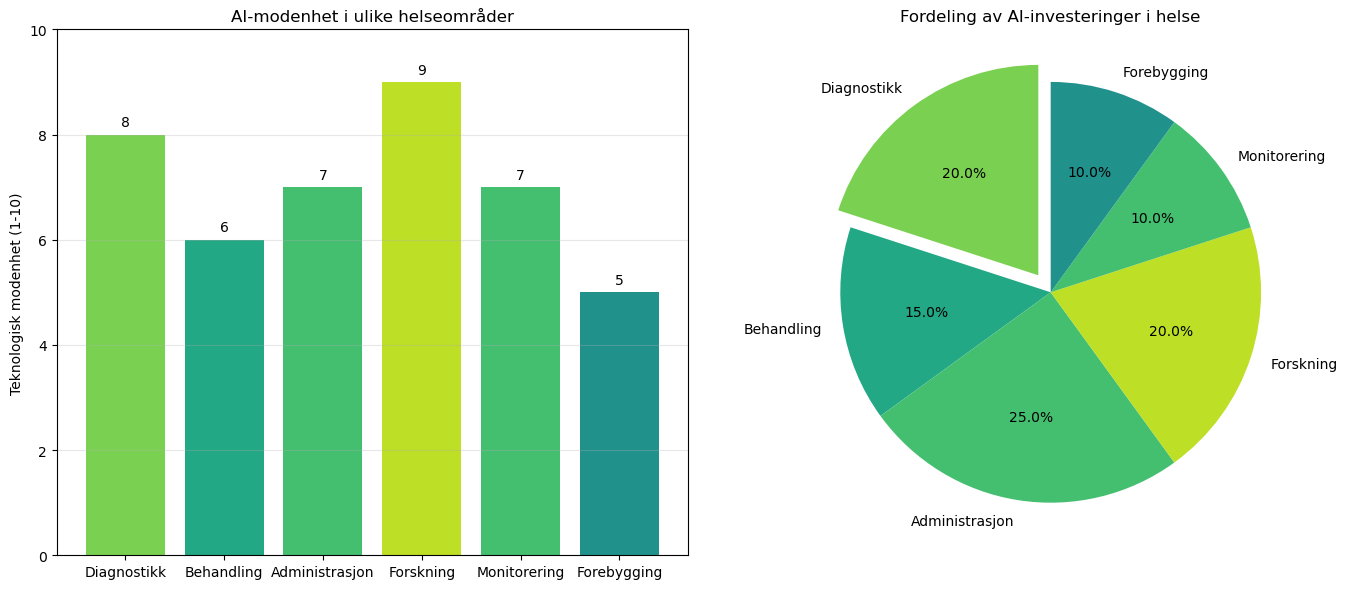

🏥 Konkrete AI-eksempler i norsk helsevesen:

Diagnostikk:
  → Bildeanalyse (røntgen, MR)

Behandling:
  → Robotkirurgi, medisinoptimering

Administrasjon:
  → Journalføring, timeplanlegging

Forskning:
  → Legemiddelutvikling, genomikk

Monitorering:
  → Wearables, fjernmonitorering

Forebygging:
  → Risikoprediksjon, helseapper


In [10]:
# Kategoriser og visualiser AI-anvendelser i helse
import pandas as pd
import matplotlib.pyplot as plt

# Data om AI-anvendelser
ai_anvendelser = pd.DataFrame({
    'Område': ['Diagnostikk', 'Behandling', 'Administrasjon', 
               'Forskning', 'Monitorering', 'Forebygging'],
    'Modenhet': [8, 6, 7, 9, 7, 5],  # Skala 1-10
    'Eksempler': [
        'Bildeanalyse (røntgen, MR)',
        'Robotkirurgi, medisinoptimering',
        'Journalføring, timeplanlegging',
        'Legemiddelutvikling, genomikk',
        'Wearables, fjernmonitorering',
        'Risikoprediksjon, helseapper'
    ]
})

# Lag subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Søylediagram for modenhet
colors = plt.cm.viridis(ai_anvendelser['Modenhet'] / 10)
bars = ax1.bar(ai_anvendelser['Område'], ai_anvendelser['Modenhet'], color=colors)
ax1.set_ylabel('Teknologisk modenhet (1-10)')
ax1.set_title('AI-modenhet i ulike helseområder')
ax1.set_ylim(0, 10)
ax1.grid(True, alpha=0.3, axis='y')

# Legg til verdier på søylene
for bar, verdi in zip(bars, ai_anvendelser['Modenhet']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(verdi), ha='center', va='bottom')

# Kakediagram for fordeling
sizes = [20, 15, 25, 20, 10, 10]
explode = (0.1, 0, 0, 0, 0, 0)  # Fremhev diagnostikk
ax2.pie(sizes, explode=explode, labels=ai_anvendelser['Område'], 
        autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Fordeling av AI-investeringer i helse')

plt.tight_layout()
plt.show()

# Vis eksempler
print("🏥 Konkrete AI-eksempler i norsk helsevesen:")
for _, row in ai_anvendelser.iterrows():
    print(f"\n{row['Område']}:")
    print(f"  → {row['Eksempler']}")

## 🧪 Hands-on: Din første AI

La oss lage en enkel regelbasert "AI" for symptomvurdering!

In [11]:
class EnkelSymptomAI:
    """En veldig enkel regelbasert AI for symptomvurdering"""
    
    def __init__(self):
        # Definer enkle regler
        self.symptom_regler = {
            'feber': {
                'høy': 'Kontakt lege umiddelbart',
                'moderat': 'Hvil og drikk væske, kontakt lege hvis varer > 3 dager',
                'lav': 'Observer, bruk febernedsettende ved behov'
            },
            'hodepine': {
                'plutselig_kraftig': 'Ring 113 - kan være alvorlig',
                'kronisk': 'Planlegg legetime',
                'mild': 'Hvil, drikk vann, vurder smertestillende'
            },
            'brystsmerter': {
                'med_pustebesvær': 'Ring 113 umiddelbart',
                'ved_anstrengelse': 'Kontakt lege samme dag',
                'muskulær': 'Observer, vurder smertestillende'
            }
        }
    
    def vurder(self, symptom, alvorlighet):
        """Gi enkel vurdering basert på symptom og alvorlighet"""
        symptom = symptom.lower()
        
        if symptom in self.symptom_regler:
            if alvorlighet in self.symptom_regler[symptom]:
                return self.symptom_regler[symptom][alvorlighet]
            else:
                return "Kontakt fastlege for vurdering"
        else:
            return "Symptom ikke gjenkjent - kontakt helsepersonell"
    
    def interaktiv_konsultasjon(self):
        """Kjør en interaktiv konsultasjon"""
        print("🤖 Enkel Symptom-AI")
        print("=" * 40)
        print("Tilgjengelige symptomer: feber, hodepine, brystsmerter")
        
        symptom = input("\nHva plager deg? ").lower()
        
        if symptom == 'feber':
            print("Temperatur: 1) Under 38.5  2) 38.5-39.5  3) Over 39.5")
            valg = input("Velg (1/2/3): ")
            alvorlighet = ['lav', 'moderat', 'høy'][int(valg)-1]
        elif symptom == 'hodepine':
            print("Type: 1) Mild  2) Kronisk  3) Plutselig og kraftig")
            valg = input("Velg (1/2/3): ")
            alvorlighet = ['mild', 'kronisk', 'plutselig_kraftig'][int(valg)-1]
        elif symptom == 'brystsmerter':
            print("Karakter: 1) Muskulær  2) Ved anstrengelse  3) Med pustebesvær")
            valg = input("Velg (1/2/3): ")
            alvorlighet = ['muskulær', 'ved_anstrengelse', 'med_pustebesvær'][int(valg)-1]
        else:
            alvorlighet = 'ukjent'
        
        anbefaling = self.vurder(symptom, alvorlighet)
        
        print("\n" + "="*40)
        print(f"📋 Vurdering: {anbefaling}")
        print("="*40)
        print("\n⚠️ VIKTIG: Dette er kun en demonstrasjon!")
        print("Ved reelle symptomer - kontakt alltid helsepersonell!")

In [12]:
# Opprett og test AI-en
min_ai = EnkelSymptomAI()

In [13]:
# Test med eksempler
print("📝 Test av regelbasert AI:")
print(f"Feber (høy): {min_ai.vurder('feber', 'høy')}")
print(f"Hodepine (mild): {min_ai.vurder('hodepine', 'mild')}")
print(f"Brystsmerter (med_pustebesvær): {min_ai.vurder('brystsmerter', 'med_pustebesvær')}")

📝 Test av regelbasert AI:
Feber (høy): Kontakt lege umiddelbart
Hodepine (mild): Hvil, drikk vann, vurder smertestillende
Brystsmerter (med_pustebesvær): Ring 113 umiddelbart


In [15]:
# Kjør interaktiv konsultasjon
print("\n" + "="*50)
# min_ai.interaktiv_konsultasjon()

## 💭 Refleksjon

### Styrker med dagens AI:
- ✅ Behandler store datamengder raskt
- ✅ Finner mønstre mennesker overser
- ✅ Konsistent ytelse 24/7
- ✅ Kan spesialiseres for spesifikke oppgaver

### Begrensninger:
- ❌ Mangler ekte forståelse
- ❌ Kan ikke generalisere som mennesker
- ❌ Sårbar for bias i treningsdata
- ❌ Mangler empati og mellommenneskelig forståelse

### 🤔 Diskusjonsspørsmål:
1. Kan AI noen gang erstatte en leges kliniske skjønn?
2. Hvordan sikre at AI-systemer er rettferdige?
3. Hvem har ansvaret når AI gjør feil?